# 1. Поиск ссылок в документах

In [1]:
import re
def GetQuotes(text):
    sentences = text.splitlines()
    for pos,sent in enumerate(sentences):
        for quotes in re.finditer(r'"(.*?)"',sent):
            s=quotes.start()
            e=quotes.end()
            print quotes.group(1)
            print s
            print e
            print sentences[pos]  # печать строки в которой встретилась фраза в кавычках
            print '=='          

In [2]:
import re
def GetCitation(text):
    sentences = text.splitlines()
    GOSTpattern=u'[Гг][оО][сС][тТ]\s[0-9\.\-\/\s]+\s[\"][а-яА-Яa-zA-ZеЁ\.\(\)\-\,\s]+[\"]'
    SANPINpattern=u'[сС][аА][нН][пП][иИ][нН]\s[0-9\.\-\/\s]+\s[\"][а-яА-Яa-zA-ZеЁ\.\(\)\-\,\s]+[\"]'
    MUpattern=u'(?:МУ|МУК)\s[0-9\.\-\/\s]+\s[\"][а-яА-Яa-zA-ZеЁ0-9\.\(\)\-\,\s]+[\"]'
        
    FZpattern=u'Федеральн[а-яА-ЯёЁ]+\sзакон[а-яА-ЯёЁ]+\s[0-9a-zA-Zа-яА-ЯёЁ\.\-\/\s]+\s[\"][а-яА-Яa-zA-ZеЁ\.\(\)\-\,\s]+[\"]'
    POSTANpattern=u'[Пп]остановлен[а-яА-ЯёЁ]+\s[0-9a-zA-Zа-яА-ЯёЁ\.\-\/\s]+\s[\"][а-яА-Яa-zA-ZеЁ\.\(\)\-\,\s]+[\"]'
    MR1pattern=u'[\"]МР\s[0-9\s\.\-]+\s[а-яА-Яa-zA-ZеЁ0-9\.\(\)\-\,\s]+[\"]'
    MR2pattern=u'[\"][а-яА-Яa-zA-ZеЁ0-9\.\(\)\-\,\s]+[\"]\sМР\s[0-9\s\.\-]+'
    ZAKONpattern=u'[Зз]акон[а-яА-ЯёЁ]+\s[0-9a-zA-Zа-яА-ЯёЁ\.\-\/\s]+\s[\"][а-яА-Яa-zA-ZеЁ0-9\.\(\)\-\,\s]+[\"][N\s]*[0-9\-\.]*'  # !! без дат в конце
    DATE_NUMpattern=u'\d{2}\.\d{2}\.\d{4}\sN\s\d{1,}\s[\"][а-яА-Яa-zA-ZеЁ0-9\.\(\)\-\,\s]+[\"]'
    NUMpattern=u'N\s[0-9]{2,}\s[\"][а-яА-Яa-zA-ZеЁ0-9\.\(\)\-\,\s]+[\"]'     # N 330 "О мерах ..."
    
    Citation_list=[]
    for sent in sentences:
        citaGOST=re.findall(GOSTpattern, sent)
        citaSANPIN=re.findall(SANPINpattern, sent)
        citaMU=re.findall(MUpattern, sent)
        citaFZ=re.findall(FZpattern, sent)
        citaPOSTAN=re.findall(POSTANpattern, sent)
        citaMR1=re.findall(MR1pattern, sent)
        citaMR2=re.findall(MR2pattern, sent)
        citaZAKON=re.findall(ZAKONpattern, sent)
        citaDATENUM=re.findall(DATE_NUMpattern, sent)
        citaNUM=re.findall(NUMpattern, sent)
        if len(citaGOST) > 0:
            Citation_list.append(citaGOST[0])
        if len(citaSANPIN) > 0:
            Citation_list.append(citaSANPIN[0])
        if len(citaMU) > 0:
            Citation_list.append(citaMU[0])
        if len(citaPOSTAN) > 0:
            Citation_list.append(citaPOSTAN[0])
        if len(citaFZ) > 0:
            Citation_list.append(citaFZ[0])
        if len(citaMR1) > 0:
            Citation_list.append(citaMR1[0])
        if len(citaMR2) > 0:
            Citation_list.append(citaMR2[0])
        if len(citaZAKON) > 0:
            Citation_list.append(citaZAKON[0])
        if len(citaDATENUM) > 0:
            Citation_list.append(citaDATENUM[0]) 
        if len(citaNUM) > 0:
            Citation_list.append(citaNUM[0])  
            
    return   Citation_list     
          
        

In [3]:
def GetNumsFromCitation(Cita_list):
     # берем только номер, остальное пока игнорируем. !!! Потом сделать список списков!!!
    Cita_nums_set=set()
    Cita_nums=()
    for item in Cita_list:
        if u"N " in item:   # например N 52-ФЗ
            pattern=u'N[0-9А-Я\-\s\.]+'
            item_name=re.search(pattern, item).group()
        if u"МР " in item:   # например N 52-ФЗ
            pattern=u'МР\s[0-9\-\s\/\.]+'
            item_name=re.search(pattern, item).group()
                
        if u"N " not in item:      
            item_name=item.split('"')[0].strip() # если гост + "" или санпин + ""
                
                #if len(item_name)==0:
                #    item_name=item.split('"')[1].strip()  #"МР 2.4.5.0107-15. 2.4.5. Гигиена. Гигиена детей и подростков..."
        Cita_nums_set.add(item_name)
    Cita_nums = list(Cita_nums_set)
    return Cita_nums

In [4]:
# BAD version
def GetDocTitle(text):
    sentences = text.splitlines()
    TitleQuotespattern=u'"(.*?)"'
    Titlepattern=u'\d{2}[0-9а-яА-яёЁ\s]+\d{4}\s(?:г\.|год)\sN\s\d{1,}'
    for pos,sent in enumerate(sentences):
        citaQuotes=re.search(TitleQuotespattern, sent)
        if citaQuotes and pos<5:
            print citaQuotes.group()
            print pos
            break
        else:
            citaDATENUM=re.search(Titlepattern, sent)
            if citaDATENUM:
                print citaDATENUM.group()
                break
                

In [15]:
main_dir = '.\\text_files_Nutrition\\'
TitleList=[u'МР 2.3.1.2432-08. 2.3.1.',
               u'N 28-1/10/2-1994',
               u'N 148',
               u'N 31',
               u'N 28',
               u'САНПИН 2.4.5.2409-08',
               u'САНПИН 2.3.2.2804-10',
               u'МР 2.4.5.0107-15. 2.4.5.',
               u'СанПиН 2.3.2.1940-05',
               u'СанПиН 2.3.2.1078-01',  # !
               u'СанПиН 2.3.2.2509-09',
               u'СанПиН 2.3.2.2401-08',
               u'СанПиН 2.3.2.2650-10',
               u'N 15-3/691-04',
               u'N 06-731']
               
# main_dir = '.\\text_files_Agriculture\\'
#TitleList= [u'НК РФ Глава 26.1', u'НК РФ Статья 284',
#                u'НК РФ Статья 145',
#                u'ФЗ N 380-ФЗ',
#                u'Федеральный проект_Создание системы поддержки фермеров',
#                u'Гос программа развития сельского хозяйства',
#                u'ФЗ N 264-ФЗ',
#                u'Правила предоставления субсидий',
#                u'Доктрина продовольственной безопасности'
           
#     ]

In [16]:
import glob, os
import networkx as nx
import codecs

G=nx.DiGraph()


for filename in glob.glob(os.path.join(main_dir, '*.txt')):
    with codecs.open(filename, 'r', encoding='utf8') as f:
        base=os.path.basename(f.name).split('.')[0]  # get file name just index (from 1.txt  ->  1)
        #base=os.path.basename(f.name).split('_')[0]  # get file name just index (from 1.txt  ->  1)
        print '--', base
        num_ind=int(base)
        text = f.read()#.decode('utf8')
        #print text.decode('utf8')
        print 'Title: ', base
        Title=TitleList[num_ind-1]
        print Title
        
        Cita_list=GetCitation(text) # лист с названиями целиком (и номер, и название, и иногда дата)     
        Cita_nums=GetNumsFromCitation(Cita_list) # берем только номера 
        for v in Cita_nums:
            print v
            G.add_edge(Title, v)

        
        print '---------------'
        

-- 1
Title:  1
МР 2.3.1.2432-08. 2.3.1.

---------------
-- 10
Title:  10
СанПиН 2.3.2.1078-01
ГОСТ 30364.2-96
ГОСТ 30627.3-98
ГОСТ 26933-86
ГОСТ 30089-93
МУ 5779-91
N 1263 
МУ 3184-84
ГОСТ 28566-90
ГОСТ 26930-86
ГОСТ 30178-96
ГОСТ 30349-96
ГОСТ 29185-91
ГОСТ 51331-99
ГОСТ 26670-85
МУК 4.2.762-99
ГОСТ 10444.11-89
ГОСТ 30418-96
МУ 01-19/47-11-92
ГОСТ 26935-86
ГОСТ 30347-97
ГОСТ 10444.12-88
ГОСТ 30726-2001
ГОСТ 9958-81
ГОСТ 18963-73
МУ 4082-86
МУК 4.2.964-00
ГОСТ 8756.18-70
ГОСТ 29270-95
ГОСТ 10444.9-88
N 987 
МУ 3049-84
ГОСТ 26932-86
МУК 4.4.1.011-93
СанПиН 42-123-4083-86
ГОСТ 51698-2000
МУК 2.3.2.721-98
ГОСТ 10444.8-88
N 988 
ГОСТ 26931-86
ГОСТ 30706-2000
ГОСТ 7702.2.1.-95
ГОСТ 26934-86
ГОСТ 30705-2000
ГОСТ 23452-79
МУК 3.2.988-00
ГОСТ 10444.1-84
N 554 
ГОСТ 7702.2.7.-95
МУК 4.1.003-95
ГОСТ 26927-86
ГОСТ 7702.2.3.-93
ГОСТ 7702.2.6-93
ГОСТ 26181-84
ГОСТ 30627.1-98
ГОСТ 7702.2.5.-93
МУК 4.1.991-00
ГОСТ 7698-93
ГОСТ 27669-88
МУК 4.1.986-00
ГОСТ 26972-86
N 29-ФЗ 
N 52-ФЗ 
ГОСТ 26811-86
МУК

In [17]:
print G.number_of_nodes()

138


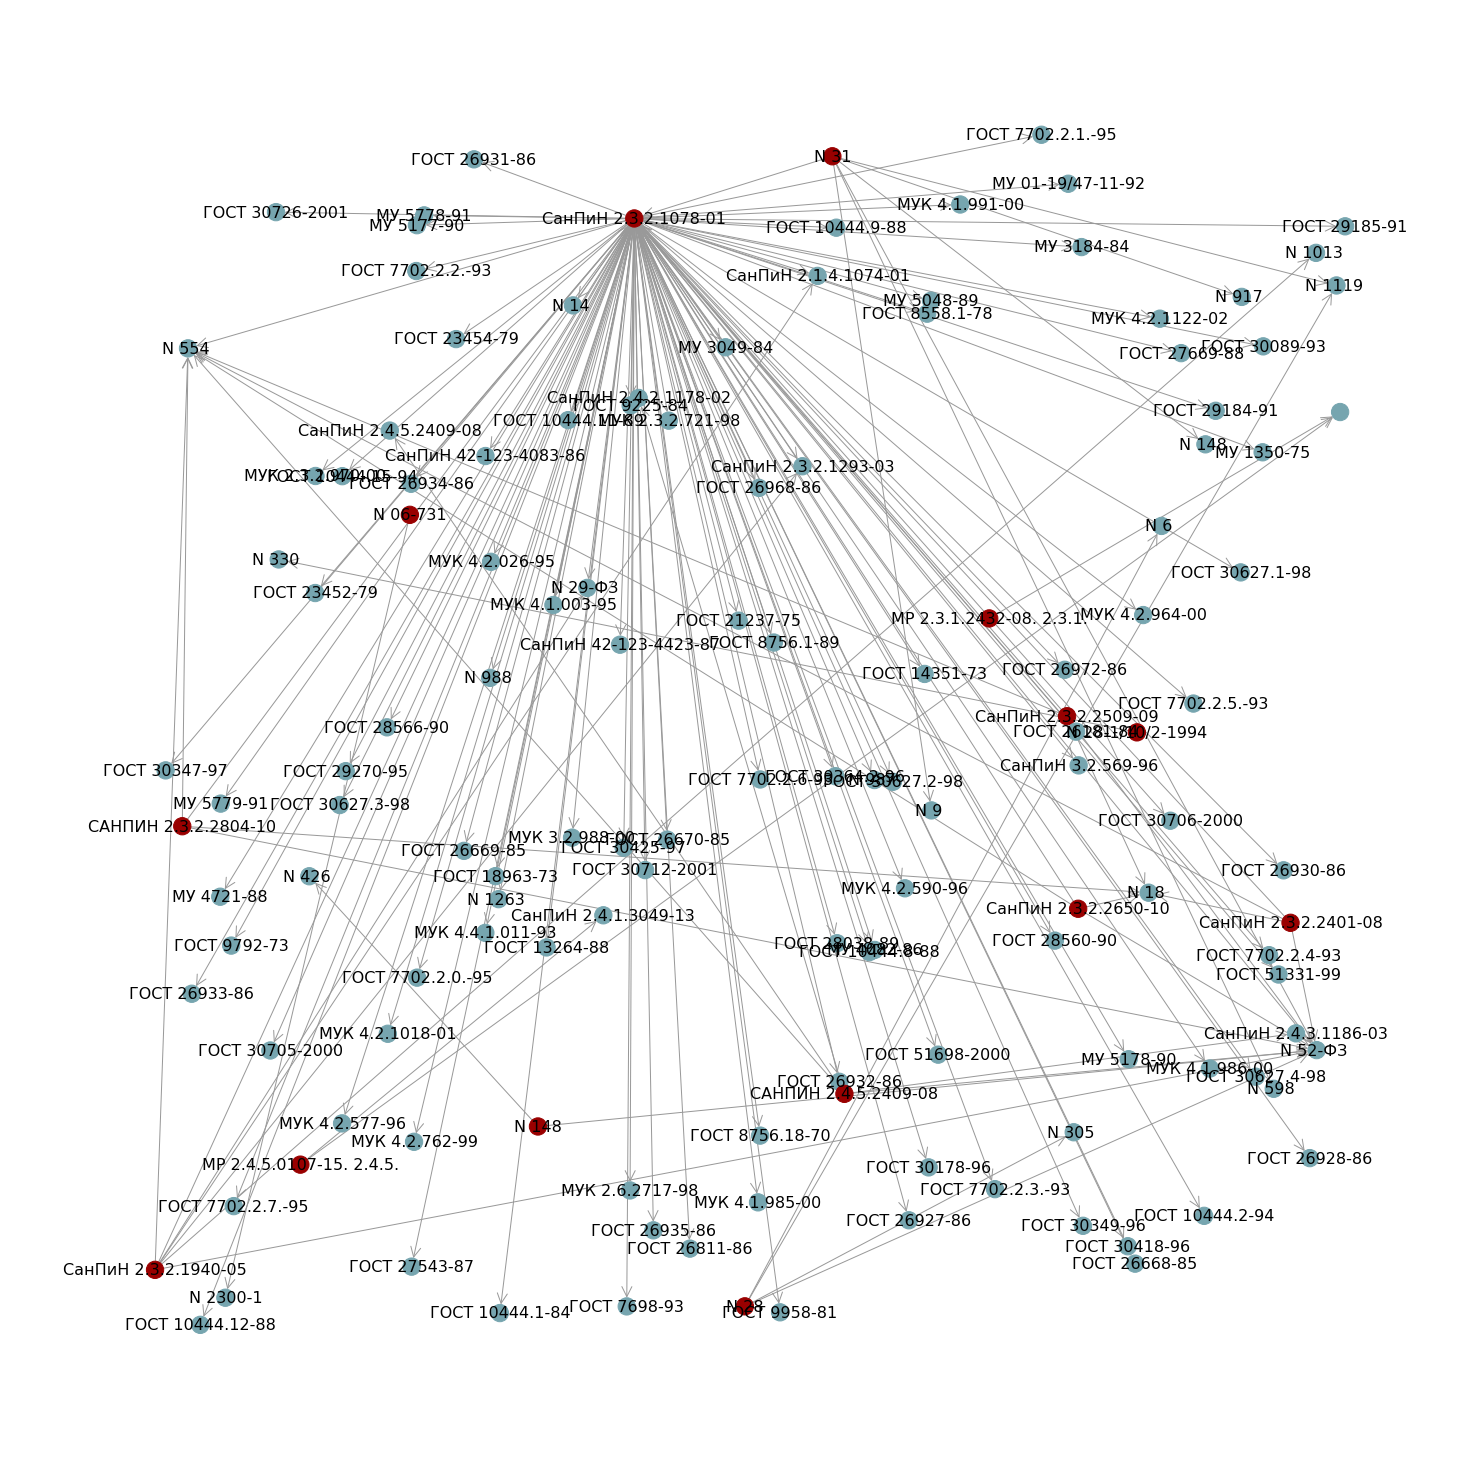

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))

node_colors = ['#76a5af' if not node in TitleList else '#990000' for node in G.nodes()]


pos=nx.random_layout(G)
nx.draw(G, pos, with_labels = True, node_color=node_colors, edge_color='#999999', font_size=16, arrowstyle='->', arrowsize=25)


In [20]:
fig.savefig('DocsCita_Agricult.png', bbox_inches='tight', pad_inches=0)

# !!! TextRank  Извлечение ключевых слов


Input file: 4.txt
raw_words saved to temp file: temp_raw_words.txt
Lema's done!
('tokens', 4666)
('unique words', 1143)
('scores', 6380)
Graph done!
PageRank done!


keywords:
население | изделие | хлеб | хлебобулочный | продукт | витамин | питание | развитие | производство | потребление | область | специализированный | функциональный | дефицит | хлебопечение | обогащать | микронутриент | продукция | b | концепция


keywords_phrases:
функциональный продукт микронутриент развитие производство дефицит специализированный | питание витамин население дефицит | b дефицит витамин | дефицит витамин | потребление население | продукция потребление | обогащать потребление витамин | хлебобулочный изделие продукт хлеб | обогащать продукция хлебобулочный микронутриент производство | питание функциональный продукт микронутриент обогащать специализированный | обогащать питание продукт развитие производство | потребление микронутриент | функциональный продукция специализированный | хлебобулочный издели

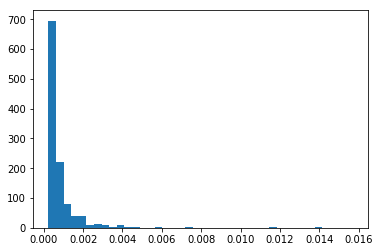

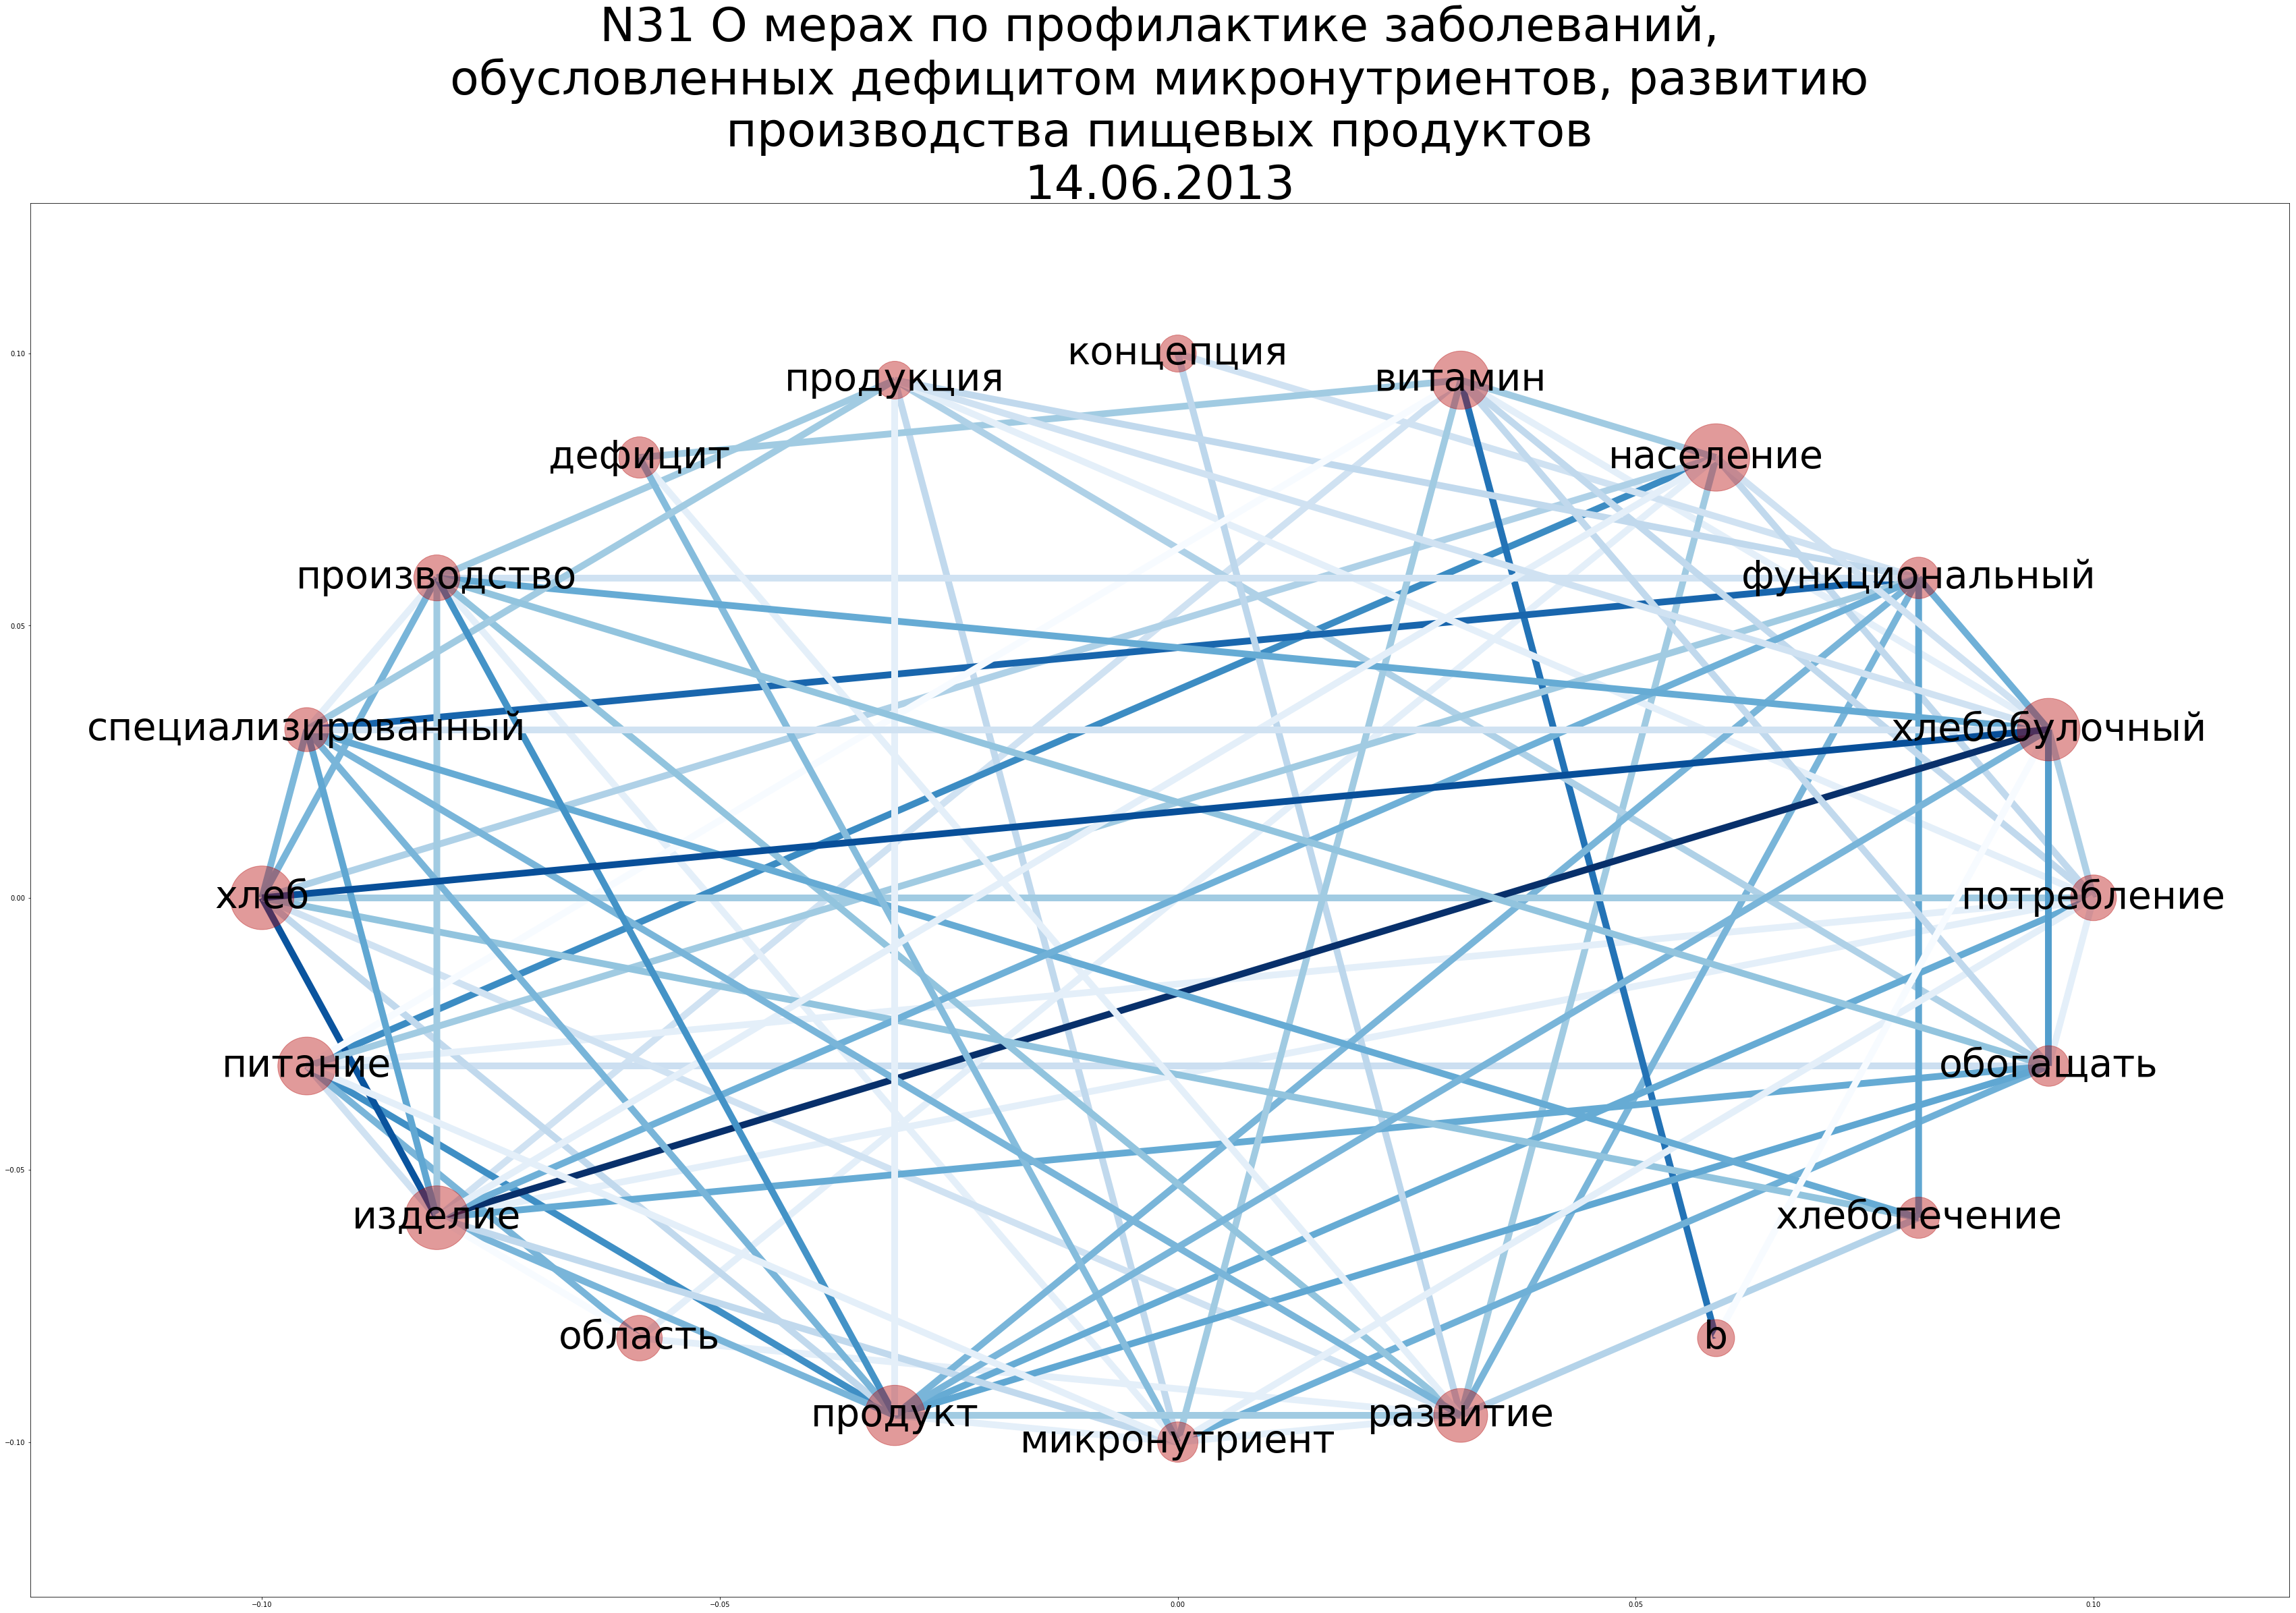

In [21]:
import nltk

def fast_lemmatize(in_file):

    # !!!! vvv set IN file HERE vvv !!!
    text_file_name = in_file
    
    # =======================================================

    # where is (Messy)Mystem? in the...
    dst_dir = r'D:\Anaconda2\.local\bin'
    exe_file_name = 'mystem.exe'
    exe_arg = '-c' # new strings, w/o input coping
    in_file_name = 'in.txt' # temp
    out_file_name = 'out.txt' # temp

    # build path-es
    import os
    src_dir = os.curdir          
    src_file = os.path.join(src_dir, text_file_name)
    dst_file = os.path.join(dst_dir, text_file_name)
    exe_file = os.path.join(dst_dir, exe_file_name)
    in_file = os.path.join(dst_dir, in_file_name)
    out_file = os.path.join(dst_dir, out_file_name)
    
    # copy text file into mystem folder and rename to in.txt
    import shutil
    shutil.copy(src_file,dst_dir)
    if os.path.exists(in_file):
        os.remove(in_file)
        print "File " + in_file_name + " was overwriten"

    os.rename(dst_file, in_file)
    
    # call mystem like external executable
    import subprocess
    retcode = subprocess.call([exe_file, exe_arg, in_file, out_file])
    if retcode == 0:
        print "Lema's done!"
       
    #read lema's
    with open(out_file, "r") as f:
        raw_tokens = f.read().decode('utf8').split()
        
    #cleanUp
    if os.path.exists(in_file):
        os.remove(in_file)
    if os.path.exists(out_file):
        os.remove(out_file)
        
    return raw_tokens
        
#--------------------------------------------------------
#========================================================
def extarcat_keywords(in_file_ind, out_file, keywords_n, wnd_size):
    import os
    import json
    from itertools import combinations
    import collections
    from nltk.tokenize import RegexpTokenizer
    from nltk.corpus import stopwords
    import networkx as nx
    import math

    keywords_n # = 20
    wnd_size # = 5
    main_dir = '.\\text_files_for summarization_no_tables\\'
    docs_list = 'docs_list.txt'
    
    #----- Get file name and Titles ------
    with open(docs_list, 'r') as f:
        all_titles = f.read().decode('utf8')
    
    all_titles_list = all_titles.split("\n")
    doc_title = all_titles_list[in_file_ind-1].split(" | ")
    in_file = doc_title[0]
   
    #------------------------
    
    
    print('Input file: ' + in_file)
    with open(main_dir + in_file, 'r') as f:
        text = f.read().decode('utf8').lower()

    # base stop words
    russian_stopwords = stopwords.words("russian")
    rsw = [word for word in russian_stopwords] # convert from unicode to str

    #extend stop words - UNICODE file
    with open(r"stop_extend.txt", "r") as f:
        rsw = rsw + f.read().decode('utf8').split()

    tokenizer = RegexpTokenizer(u'[A-Z|a-z|А-Я|Ё|а-я|ё|\.]+') # only words and '.'

    raw_words_file = tokenizer.tokenize(text.lower())
    
    #save tokenz
    with open("temp_raw_words.txt", 'w') as f:
        for item in raw_words_file:
            if item <> '.':
                        f.write("%s\n" % item.encode('utf8'))
    print "raw_words saved to temp file: temp_raw_words.txt"

    # call lemmatizer
    raw_tokens = fast_lemmatize("temp_raw_words.txt")

#     if os.path.exists("temp_raw_words.txt"):     
#         os.remove("temp_raw_words.txt")

    def parse_token(raw_token): # to token,  lemma, check for end of sent -> .
        import re
        m1 = re.search(u'([A-Za-zА-ЯЁа-яё]+){', raw_token) #[0] raw word
        m2 = re.search(u'{([A-Z|a-z|А-Я|Ё|а-я|ё]+?)\?*[|}]', raw_token) #[1] lemma, first variant
        l = list()
        if m1 and m2:
            l.append(m1.group(1))
            l.append(m2.group(1))
        else:
            l =["",""]
        l.append(raw_token.endswith('.')) #[2] "ends with '.' ? "
        return l

    #parse
    tokens = [parse_token(raw_token) for raw_token in raw_tokens]
         
        
    # exclude stop words
    tokens = [token for token in tokens if token[1] not in rsw]
    
   #== !!! Печать токенов! Работает, но при печати не те кодировки, поэтому убрано !!!
#     for i in tokens:
#         print "!!!"
#         print i
        
        
    # unique words, dict -> ([0] id, [1] lemma)
    lemmas = [(i, lemma) for i, lemma in \
             enumerate(list(set([token[1] for token in tokens])))]
    
   
    
    #set id of sent for tokens
    sent_id = 0
    for i in range(len(tokens)):
        fl = tokens[i][2]
        del tokens[i][-1] # delete flag [2] from list
        tokens[i].append(sent_id) # add to [2] sent_id
        if fl:
            sent_id += 1 # increment

    #get index (id) of lemma in dict by lemma
    def get_lemma_id(lemma_name):
        for lemma in lemmas:
            if lemma[1] == lemma_name:
                return lemma[0]    

    # [0] - id, [1] - raw_word, [2] - lemma_id, [3] - lemma, [4] - sent_id
    tokens = [(i, token[0], get_lemma_id(token[1]), token[1], token[2]) \
              for i, token in enumerate(tokens)]

    print  ("tokens",  len(tokens))
    print  ("unique words", len(lemmas))
      
    
    pairs_dict = dict()

    def get_key(i1,i2):
        frst = min(i1,i2)
        sec = max(i1,i2)
        k = "_".join([str(frst),str(sec)])
        return k

    def tokens_dist_w(t1, t2):
        token_dist = abs(t2[0]-t1[0])
        sent_dist = abs(t2[4]-t1[4])
        d = (1.0-(token_dist-1)/(wnd_size-1))/((2*sent_dist)+1) #1.0/((token_dist)*((2*sent_dist)+1))
        #d = (1.0-(token_dist-1)/(wnd_size-1))
        return d

    def increment_dict_elem(key, by_value):
        if key in pairs_dict:
            pairs_dict[key] += by_value
        else:
            pairs_dict[key] = by_value

    tokens_num = len(tokens)

    for start in range (tokens_num-(wnd_size-1)):
        for lag in range(wnd_size-1):
            if (start+lag+1) < tokens_num:
                increment_dict_elem(get_key(tokens[start][2], tokens[start+lag+1][2]), \
                                    tokens_dist_w(tokens[start], tokens[start+lag+1]))
    scores = []
    for key in pairs_dict:
        ids = key.split("_")
        if ids[0] <> ids[1]:
            scores.append((int(ids[0]), int(ids[1]), pairs_dict[key]))

    # remove 0 freq pairs
    #scores = filter(lambda x: x[2], scores)
    print ("scores", len(scores))


    g = nx.Graph()
    g.add_weighted_edges_from(scores)
    print "Graph done!"

    pr = nx.pagerank(g)
    print "PageRank done!"

    # sort words by pagerank (index, pr, word)
    result = sorted(((word[0], pr[word[0]], word[1]) for word in lemmas if word[0] in pr), 
                    key=lambda x: pr[x[0]], reverse=True)
    top_n = result[:keywords_n] #sorted(result[:keywords_n])
    keywords_list = [x[2] for x in top_n]
    keywords_rank = [x[1] for x in top_n]
    keywords_rank_all = [x[1] for x in result]
    keywords = set(keywords_list)
    
    def get_keyword_rank(kw):
        for i in range(len(keywords_list)):
            if keywords_list[i] == kw:
                return keywords_rank[i]
        return 0.0

    #post-proc, mark tokens is keyword 
    # [0] - id, [1] - raw_word, [2] - lemma_id, [3] - lemma, [4] - sent_id, [5] - is keyword, [6] - pagerank
    marked_raw_words = [(token[0], token[1], token[2], token[3], token[4], \
                        ({token[3]} <= keywords), get_keyword_rank(token[3])) \
                        for token in tokens]

        
    # look for keywords phrases
    keyword_set = set()
    keyword_set_list = list()

    token_qs = list()
    token_q = list()

    def flush_keyword_set(ks, ksl):
        for i in range(len(ksl)):
            existed_ks = ksl[i]

            if (existed_ks >= ks) or (existed_ks <= ks):
                ksl[i] = (existed_ks | ks)
                return ksl
        ksl.append(ks)
        return ksl

    cont = False

    for i in range(len(marked_raw_words)-1):
        if (marked_raw_words[i][5] and marked_raw_words[i+1][5]) and \
        (marked_raw_words[i][4] == marked_raw_words[i+1][4]):
            keyword_set.add(marked_raw_words[i+1][3])
            token_q.append(marked_raw_words[i+1][1])
            if not cont:
                keyword_set.add(marked_raw_words[i][3])
                token_q.append(marked_raw_words[i][1])
                
            cont = True
        else:
            cont = False
            if len(token_q) > 0: # flush str
                token_qs.append(token_q)
                token_q = list()
                keyword_set_list = flush_keyword_set(keyword_set, keyword_set_list)
                keyword_set = set()


#===================

    keywords_str = " | ".join(keywords)
    keywords_pairs = " | ".join([" ".join(p) for p in keyword_set_list])
    words_qs = " | ".join([" ".join(p) for p in token_qs])
    print("\n\nkeywords:")
    print " | ".join(keywords_list)
    print("\n\nkeywords_phrases:")
    print keywords_pairs
    print("\n\nwords_phrases:")
    print words_qs
    
    head = in_file + " | wnd_size " + str(wnd_size) + \
            " | keywords_n " + str(keywords_n) + " | "
    with open(main_dir + out_file, 'a+') as f:
        f.write((head + "@kw | " + keywords_str).encode('utf8'))
        f.write((" | @kw_ph | " + keywords_pairs).encode('utf8'))
        f.write((" | @wr_ph | " + words_qs).encode('utf8'))
        f.write(("\n").encode('utf8'))
    
    print "\n\nresults saved (added) to out file: " + out_file
    print "all done! Exit 0"
#     return None
    
    keyword_scores = [(lemmas[score[0]][1], lemmas[score[1]][1], round(math.log(score[2]),2)) \
                      for score in scores \
                      if (({lemmas[score[0]][1]} <= keywords) and \
                          ({lemmas[score[1]][1]} <= keywords) and \
                          (score[0] <> score[1]) and \
                          round(math.log(score[2]),2)>0.0
                         )
                     ]
    
    keyword_scores.sort(key = lambda x: x[2], reverse=True) 


#======================   Graph    ========================================================    
    import matplotlib.pyplot as plt
    import matplotlib.colors as colors
    
    plt.hist(keywords_rank_all, bins=40)
    
    
    g2 = nx.Graph()
    g2.add_weighted_edges_from(keyword_scores)
    nodes_list = g2.nodes()
        
    pos = nx.shell_layout(g2, scale=0.1)
    
    # !!!for spring layout: 
    # k controls the distance between the nodes and varies between 0 and 1
    # iterations is the number of times simulated annealing is run
    # default k =0.1 and iterations=50
    # OR: scale=2 # double distance between all nodes
     
    # Attributes
    weights = nx.get_edge_attributes(g2,'weight')
    labels = nx.get_node_attributes(g2,'label')
    
    # Plot Figure
    fig = plt.figure(figsize=(60,38))
    
    
    # Edges & weights
    edges, colors = zip(*weights.items()) 
    
    out = nx.draw_networkx_edges(g2, pos, width=10, edgelist=edges, edge_color = colors, 
                                edge_cmap=plt.cm.Blues, vmin = 0.0, vmax = max(colors))
    
    nx.draw_networkx_nodes(g2, pos, node_color='#B40404',
                           node_size=[get_keyword_rank(nd)*10000/keywords_rank[0] for nd in nodes_list],
                            alpha=0.4, with_labels=True)
    
    nx.draw_networkx_labels(g2,pos, nodes_labels=labels, font_size=57)
    
    from textwrap import wrap
    plt.title('\n'.join(wrap( doc_title[1],50))+"\n"+doc_title[2], size=70) 
    #plt.title(graph_title, size=80)
    #plt.axis('off')
   
      
    plt.savefig(main_dir + os.path.splitext(in_file)[0] + "_Graph.png", format="png", dpi=70)
    #plt.show()
    


# CALL
#extarcat_keywords(in_file_index_in_list, out_file, keywords_n, wnd_size)

extarcat_keywords(4, 'keyword_results.txt', 20, 3)

